# Preventing Credit Card Fraud with Advanced Machine Learning Models

## Abstract

In this work, we address the problem of fraudulent credit card transactions and conduct a formal analysis and performance evaluation of a range of widely-used supervised and unsupervised machine learning techniques for fraud detection. First, we preprocess an open dataset available to the online community on [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv) to extract relevant information and analyze the intrinsic issues within the dataset that impact fraud detection [[1](https://www.sciencedirect.com/science/article/abs/pii/S2214212618304216), [2](https://www.aaai.org/Papers/Workshops/2000/WS-00-05/WS00-05-003.pdf), [3](https://ieeexplore.ieee.org/abstract/document/7376606)] (data scarcity, data heterogeneity, stationarity, cold start, and data imbalance). We further use this dataset to train supervised learning algorithms and analyze the performance of different models using Python libraries to establish a benchmark for evaluating and selecting the best model.

**Keywords**: Fraud detection, machine learning, data imbalance, Python.

## 1. Introduction

E-commerce undoubtedly constitutes a paradigm shift in business today. In addition to the design and implementation of efficient e-commerce platforms for buying and selling goods and services using various devices such as personal computers, tablets, and smartphones, the backbone of such commercial operations is the use of credit cards, without which electronic exchanges would be meaningless. Consequently, there has been an explosive increase in credit card transactions in recent years, leading to a shift in business dynamics. While the era of Big Data and new technologies offers unprecedented opportunities to improve quality of life and social well-being, they are not entirely free from problems, creating inefficiencies in their implementation. In the specific case of credit card transactions, fraud is a significant issue, leading to short-term financial losses that affect not only banks and merchants but also individual customers. In the long term, fraud can negatively impact a company's image, causing defrauded customers to lose trust and turn to competitors [[4](https://www.sciencedirect.com/science/article/abs/pii/S095741741400089X)]. According to an analysis by "Euromonitor International," the financial cost associated with fraud has increased in the Europe, Middle East, and Africa (EMEA) region from 2006 to 2016, while the "Association of Certified Fraud Examiners" found that 15% of fraud cases involve credit card transactions, representing 80% of the total financial value [[1](https://www.sciencedirect.com/science/article/abs/pii/S2214212618304216)].

Although the concept of fraud, as old as humanity itself, is much broader than fraudulent transactions, this work focuses specifically on the latter. To prevent fraud, two types of actions are taken: fraud prevention and fraud detection [[5](https://www.semanticscholar.org/paper/Adaptive-Machine-Learning-for-Credit-Card-Fraud-Pozzolo-Bontempi/bcfbf068dff507b9ef11240e69f96d24f5d89fc1)]. The difference between them is that the former is a proactive measure, anticipating fraud by blocking it at its origin, while the latter is a reactive process, identifying whether a new credit card transaction belongs to the class of fraudulent or genuine transactions based on historical transaction data. Any Fraud Detection System (FDS) must overcome two fundamental issues: efficiency and cost-effectiveness. Efficiency means that the system must accurately determine whether a transaction is fraudulent, and cost-effectiveness implies that the cost of detection should not exceed the financial losses due to fraud. Here, machine learning techniques become attractive solutions as they are highly efficient and cost-effective compared to expert intervention (which is not excluded but complemented by ML methods, significantly reducing human effort). Furthermore, machine learning algorithms excel in detecting fraudulent transactions as supervised techniques can be trained on past transaction data to learn fraudulent patterns, and unsupervised algorithms can address fraudsters' changing behaviors to develop new fraud patterns [[6](https://www.sciencedirect.com/science/article/abs/pii/S0020025519304451)]. Numerous efforts and contributions have been made to apply machine learning techniques to fraud detection, such as Convolutional Neural Networks (CNN) [[7](https://link.springer.com/chapter/10.1007/978-3-319-46675-0_53)], Random Forest [[8](https://ieeexplore.ieee.org/abstract/document/8361343)], and other innovative methods [[1](https://www.sciencedirect.com/science/article/abs/pii/S2214212618304216)]. In line with this, this work aims to conduct a comparative study of various supervised and unsupervised machine learning algorithms, evaluating their performance in detecting fraudulent transactions [[9](https://arxiv.org/abs/1904.10604), [6](https://www.sciencedirect.com/science/article/abs/pii/S0020025519304451)].

## 2. Dataset Description

The selected dataset corresponds to a set of transactions carried out by credit card holders in Europe over two days in 2013.

In [1]:
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Importing libraries
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import getpass

# Module to interact with the OS
import os

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Enter the directory path
directory = getpass.getpass(prompt='Enter the directory path: ')

# Enter the file name
file_name = getpass.getpass(prompt='Enter the CSV file name (with extension): ')

# Fll path to the file
full_path = os.path.join(directory, file_name)

# Load the CSV file
df = pd.read_csv(full_path)

Enter the directory path: ········
Enter the CSV file name (with extension): ········


## 3. Exploratory data analysis

In [3]:
# First rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Last rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Shape of the dataset
df.shape

(284807, 31)

In [6]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Count missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

First of all, we must perform data preprocessing, which leads us in the first instance to determine the number of fraudulent and non-fraudulent transactions in our dataset (binary).

Text(0.5, 1.0, 'Comparison of number of fraudulent transactions (1) vs. non-fraudulent ones (0)')

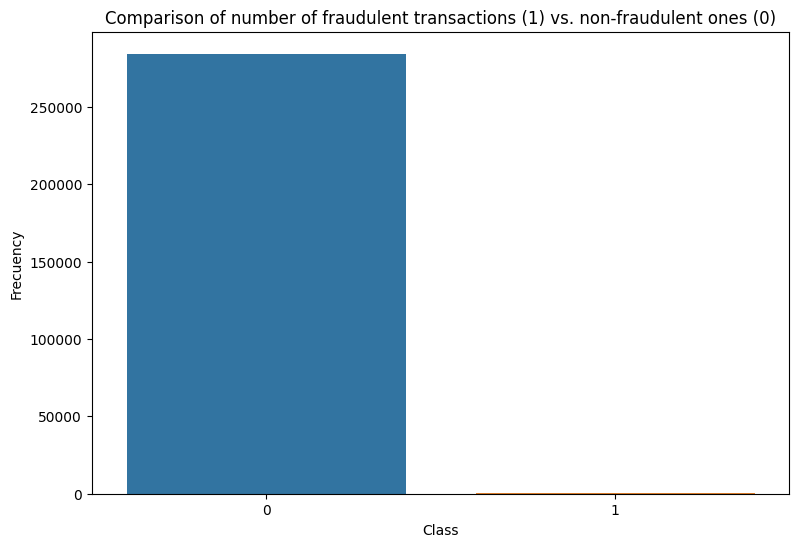

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.countplot(data=df, x="Class")

ax.set_xlabel("Class")
ax.set_ylabel("Frecuency")
ax.set_title("Comparison of number of fraudulent transactions (1) vs. non-fraudulent ones (0)")

We observed that there is a high degree of imbalance in the data (which requires special treatment). The proportion of non-fraudulent transactions is 492 out of 284,807, which corresponds to 0.17%.

In [10]:
t = df["Class"].count() # total number of transactions
t_plus = df["Class"].value_counts()[0] # number of legitimate transactions
t_minus = df["Class"].value_counts()[1] # number of fraudulent transactions

print("The percentage of legitimate transactions is: ", (t_plus/t)*100, "%")
print("The percentage of fraudulent transactions is:", (t_minus/t)*100, "%")

The percentage of legitimate transactions is:  99.82725143693798 %
The percentage of fraudulent transactions is: 0.1727485630620034 %


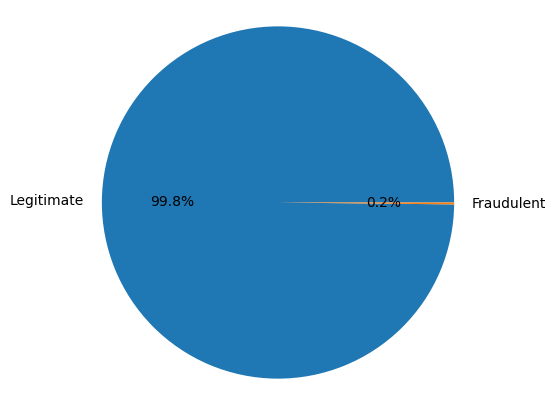

In [11]:
fig, ax = plt.subplots(figsize=(5,5))

labels = "Legitimate", "Fraudulent"
porcentajes = [(t_plus/t)*100, (t_minus/t)*100]
explode = (0, 0.1, 0, 0)

ax.pie(porcentajes, labels=labels,autopct='%1.1f%%')
ax.axis('equal')

plt.show()

Since the information has been anonymized using a principal component analysis (PCA) of the dataset to protect confidentiality, except for time and amount, which respectively contain the seconds elapsed between each transaction and the first in the dataset and the amount of the underlying transaction, we need to further analyze these two variables.

In [12]:
# Variables that require special analysis
time_parameters = df["Time"].describe()
quantity_parameters = df["Amount"].describe()

print("Relevant data of the time interval variable:")
print(time_parameters)
print("\n")
print("Relevant data of the amount variable:")
print(quantity_parameters)

Relevant data of the time interval variable:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


Relevant data of the amount variable:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


As can be seen from the following graphs, the amount distribution is highly skewed to the right since a very small portion of the transactions are close to the maximum amount which corresponds to \\$25691.16, the mean value for this distribution is \\$88.35. On the contrary, unlike the amount distribution, the temporal distribution is bimodal, this is because there is a drop in transaction activity approximately 27.78 hours after the first transaction, which makes it reasonable to assume that the drop in transaction volume occurred during the night since users sleep at this stage of the day and activity levels drop.

Text(0.5, 1.0, 'Amount Distribution')

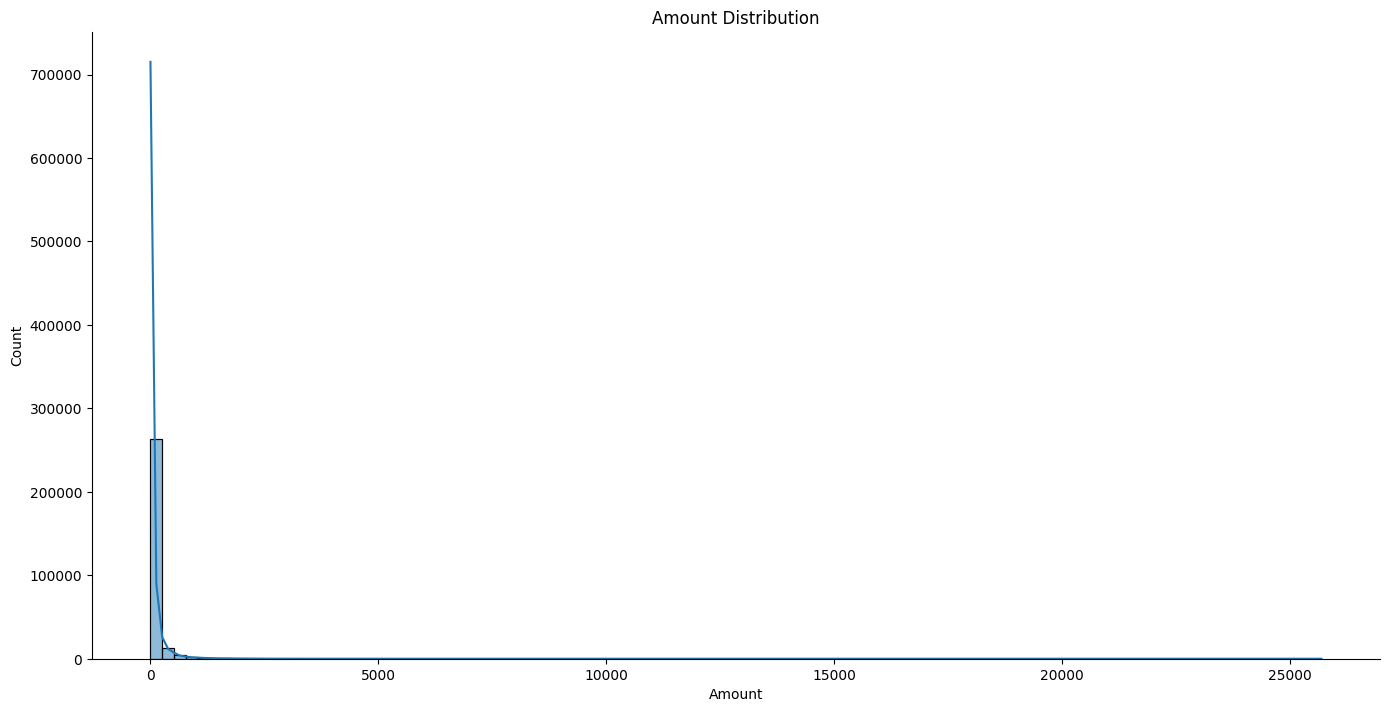

In [13]:
sns.displot(data=df, x="Amount", height=7, aspect=2.0, bins=100, kde=True)

plt.xlabel("Amount")
plt.title("Amount Distribution")

Text(0.5, 1.0, 'Temporal distribution')

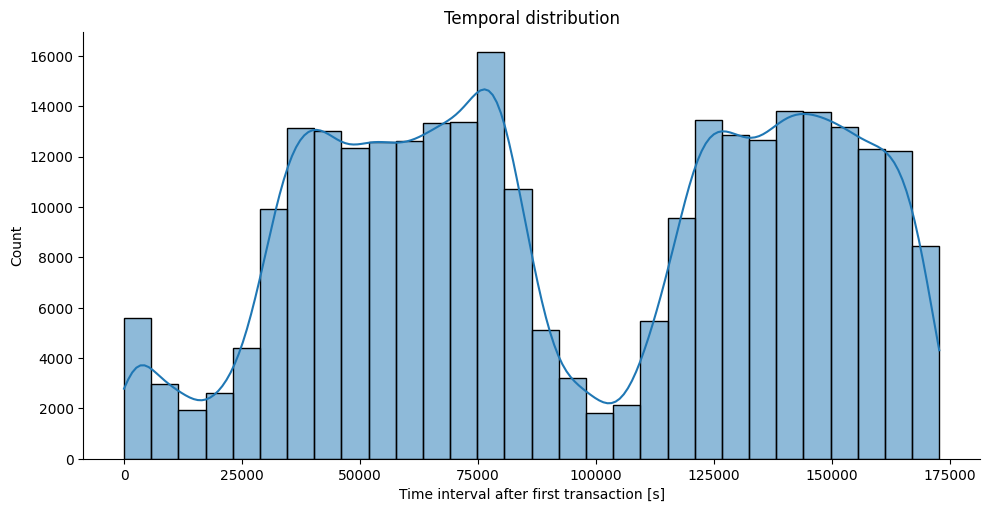

In [14]:
sns.displot(data=df, x="Time", height=5, aspect=2.0, bins=30, kde=True)

plt.xlabel("Time interval after first transaction [s]")
plt.title("Temporal distribution")

The remaining variables are obtained from a principal component analysis (PCA), a method that results in a set of uncorrelated variables and allows for dimensionality reduction.

To confirm that there are no significant correlations between the reduced components (particularly with the class characteristic), we calculate the correlation matrix.

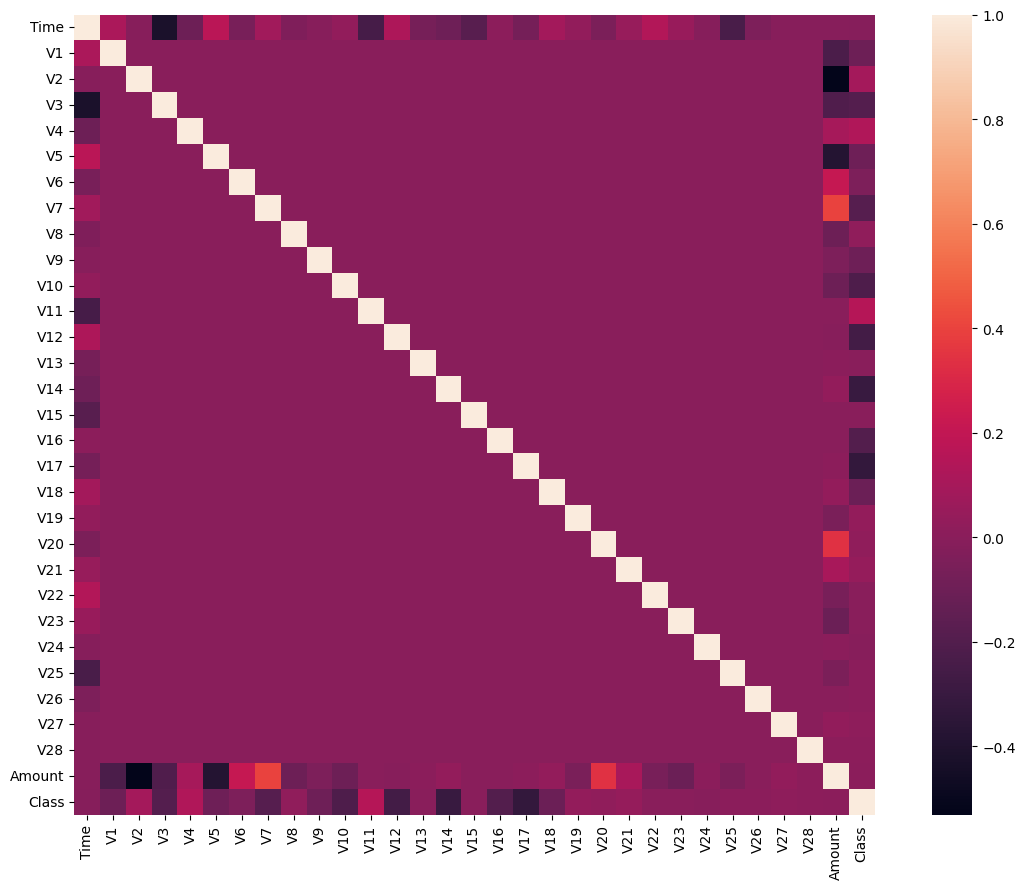

In [15]:
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_df, vmax=1.0, square = True)
plt.tight_layout()

Since the main features do not present strong correlations between them, it is not necessary to eliminate any of the variables.

The distributions of the 28 characteristics V1, V2, ..., V28 are presented below in the form of histograms. As expected, even if it is a dataset transformed by PCA, the variables are not normally distributed. In the graphs it can be observed that some of the distributions are skewed to the left and others to the right.

In total there are 31 variables, of which 28 are the features variables and the rest correspond to time, amount and class. Of all of them, the only ones that have not been transformed by PCA are time and amount and on the other hand, the class variable corresponds to our target variable which is the only categorical variable.

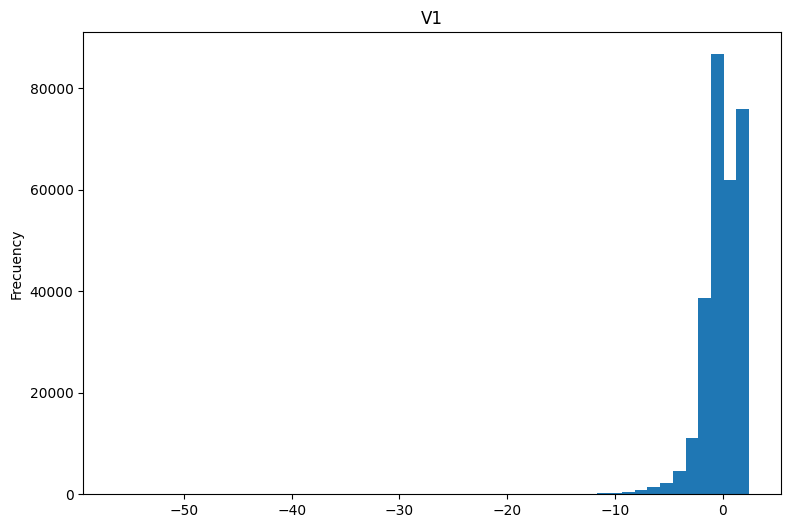

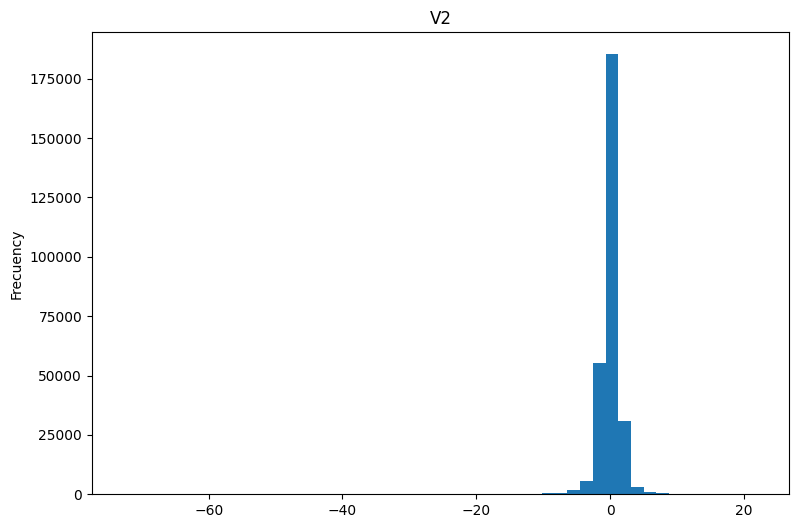

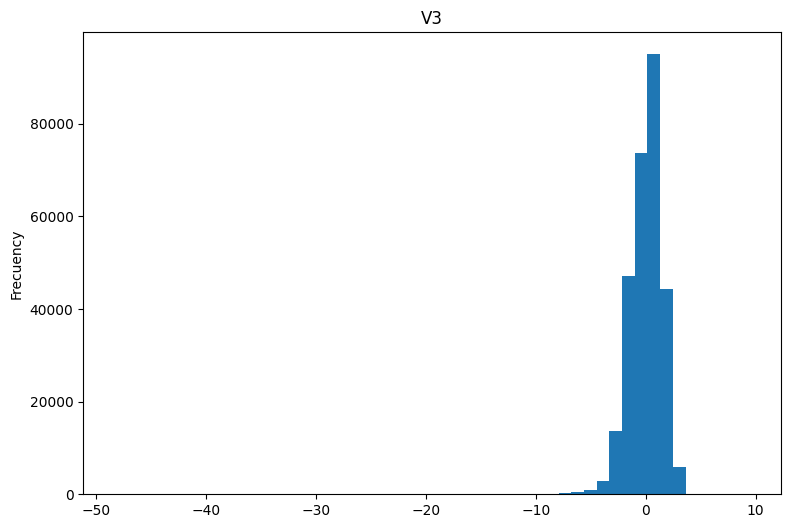

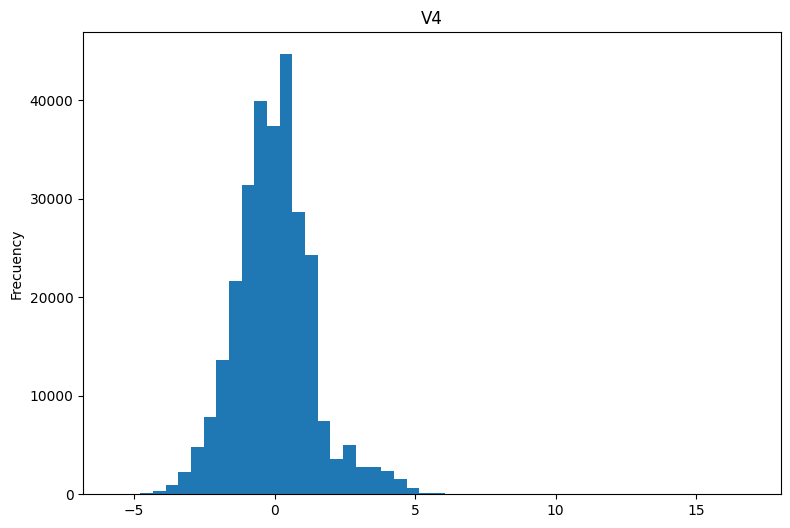

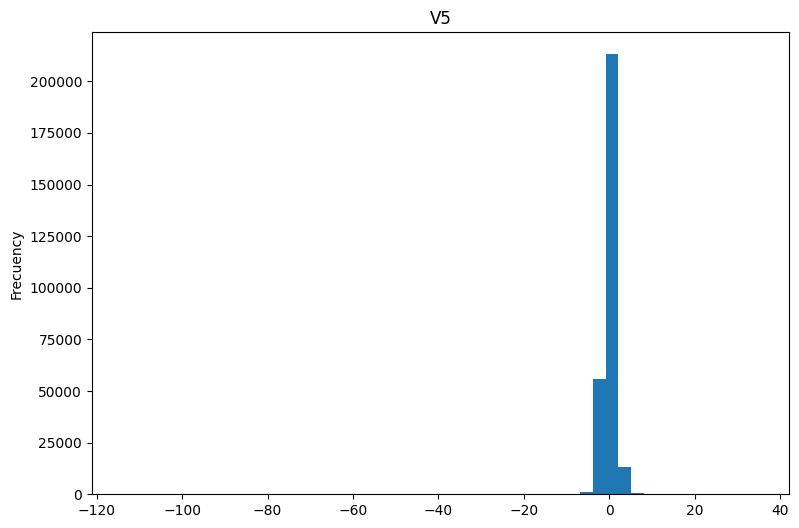

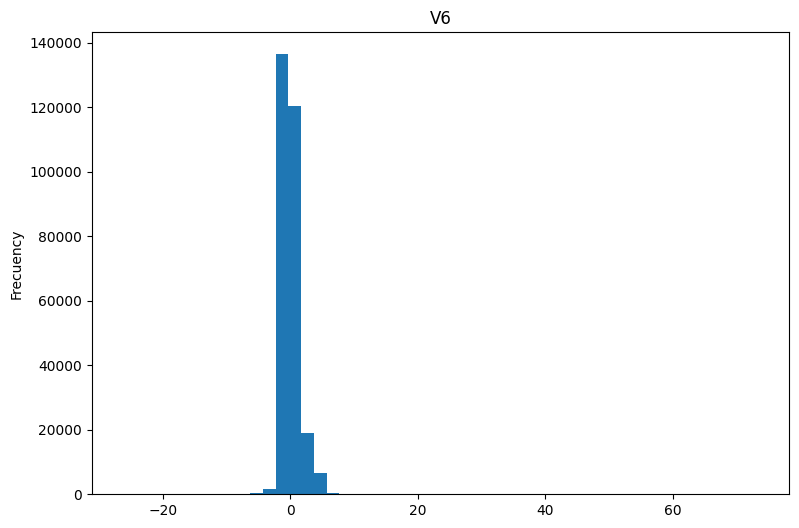

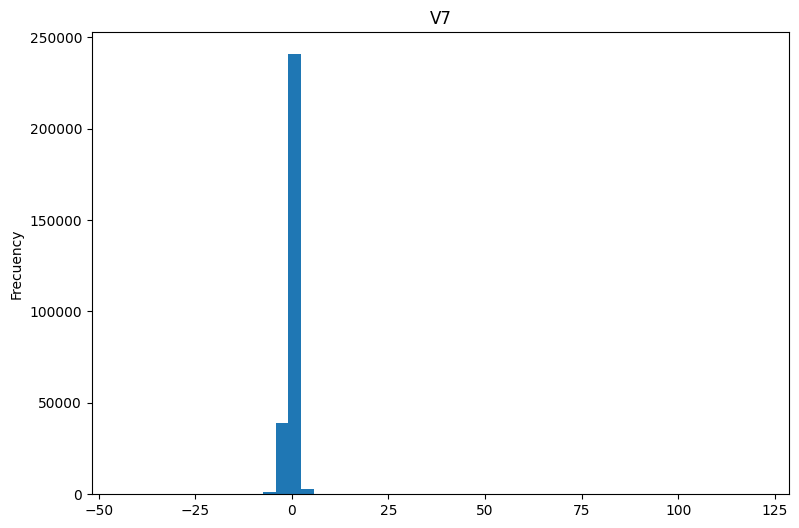

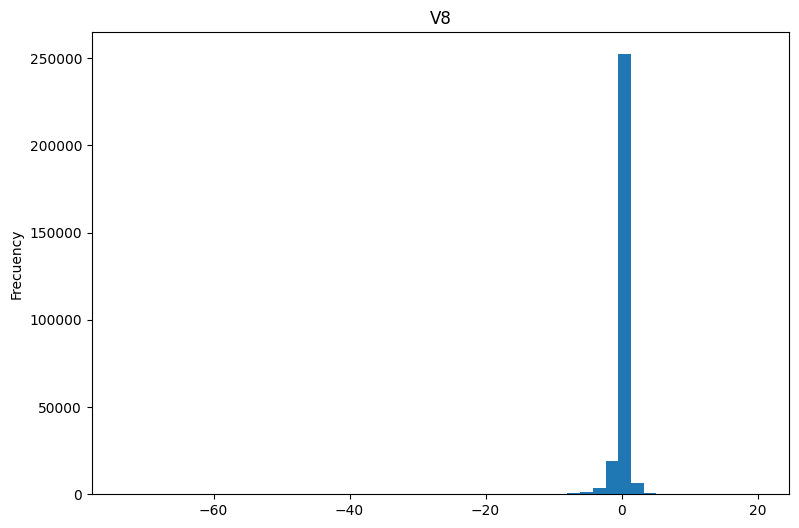

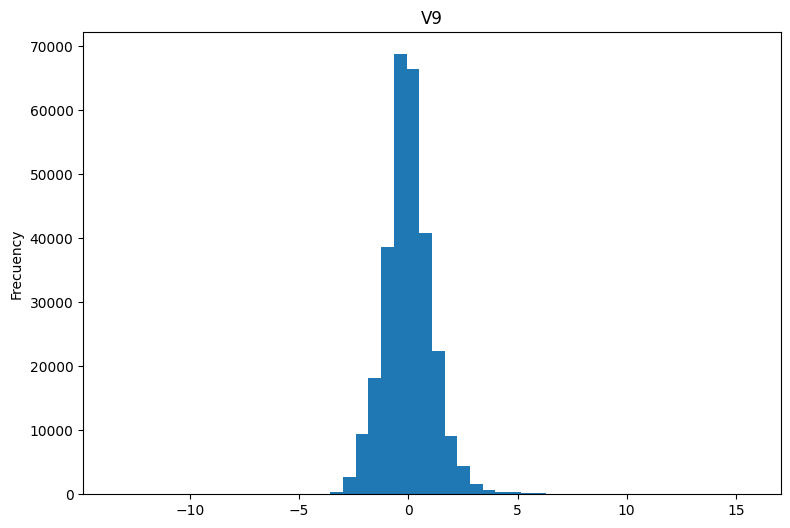

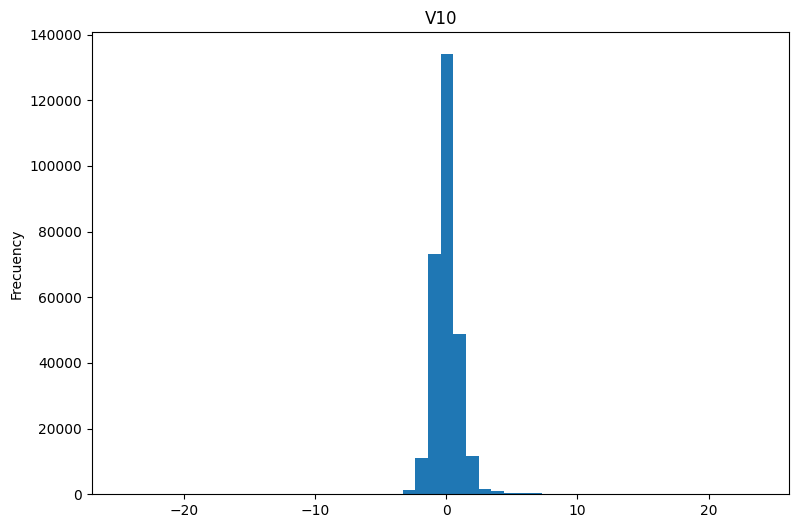

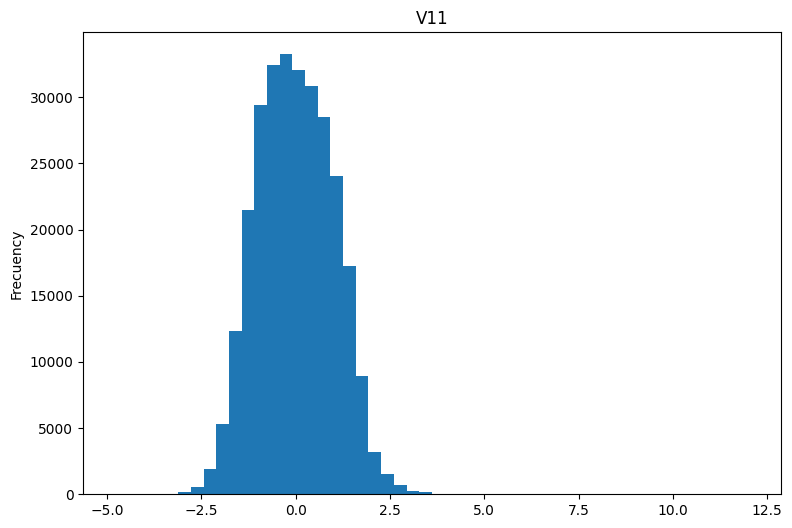

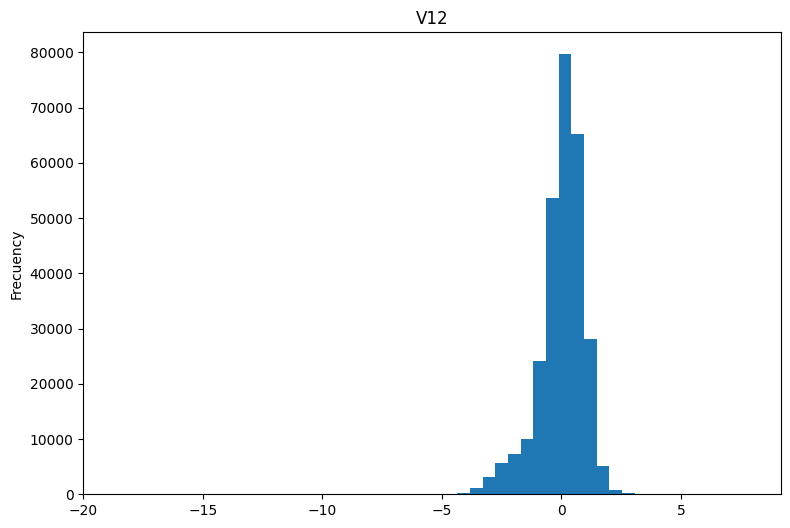

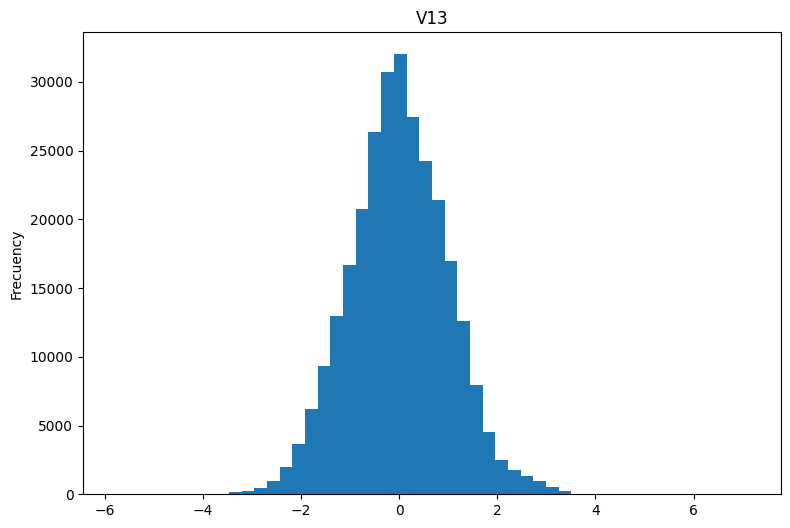

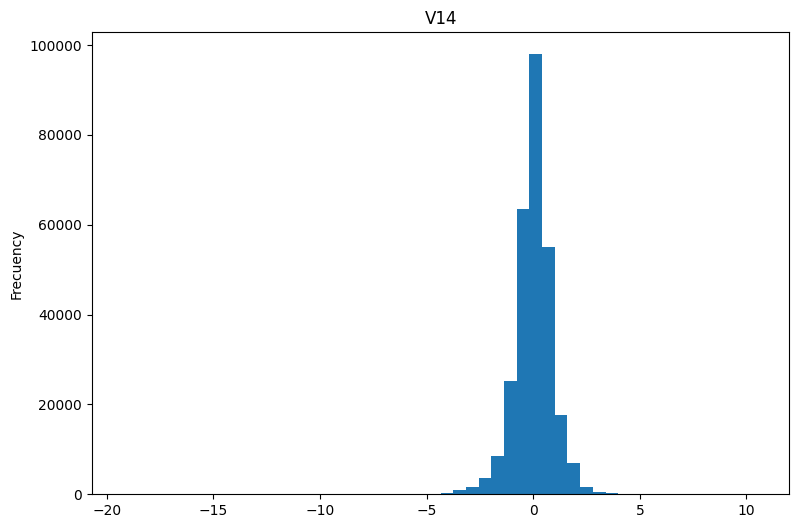

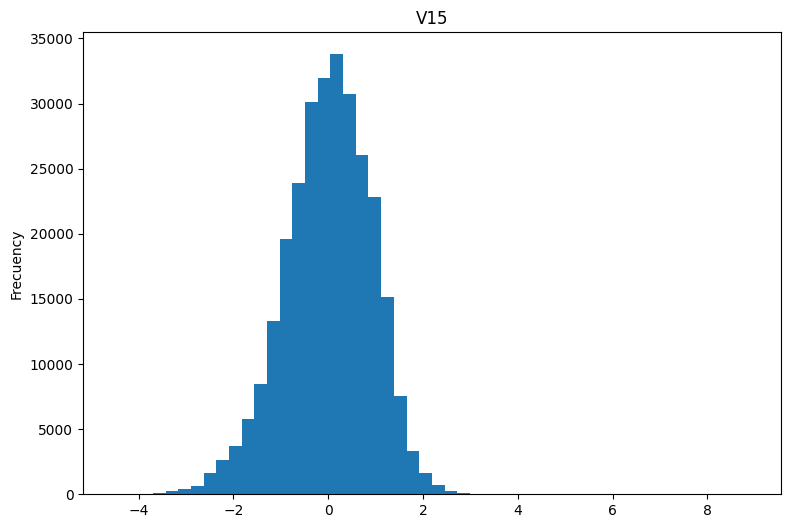

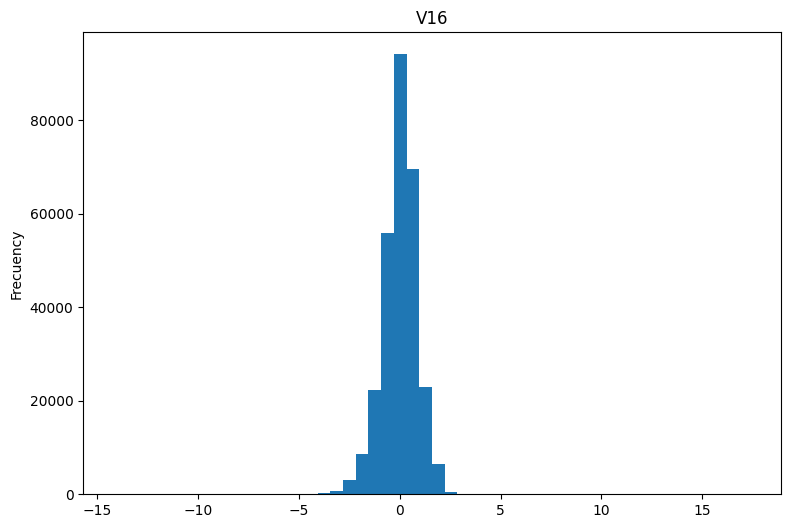

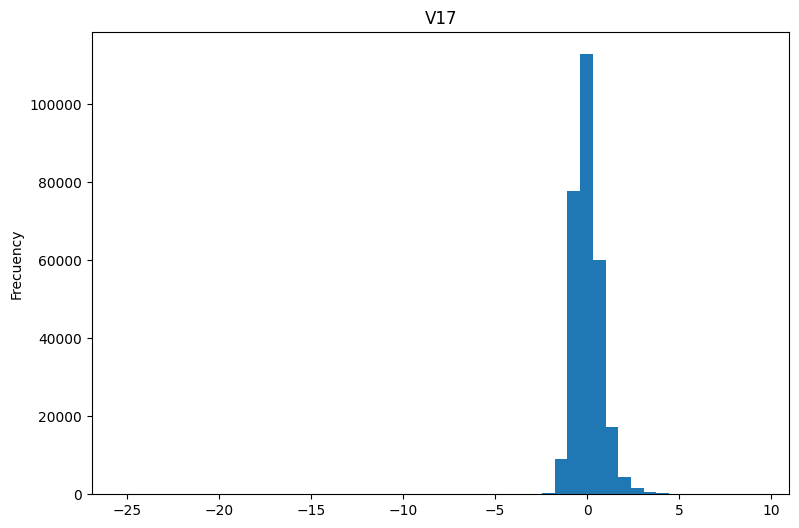

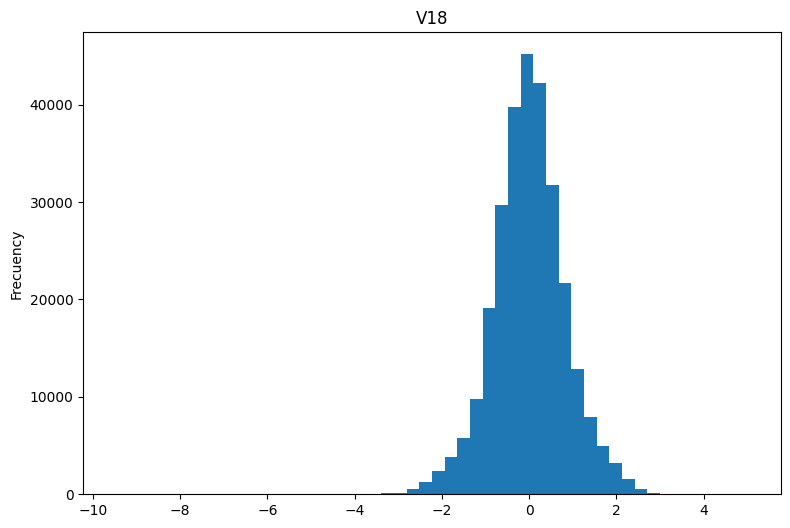

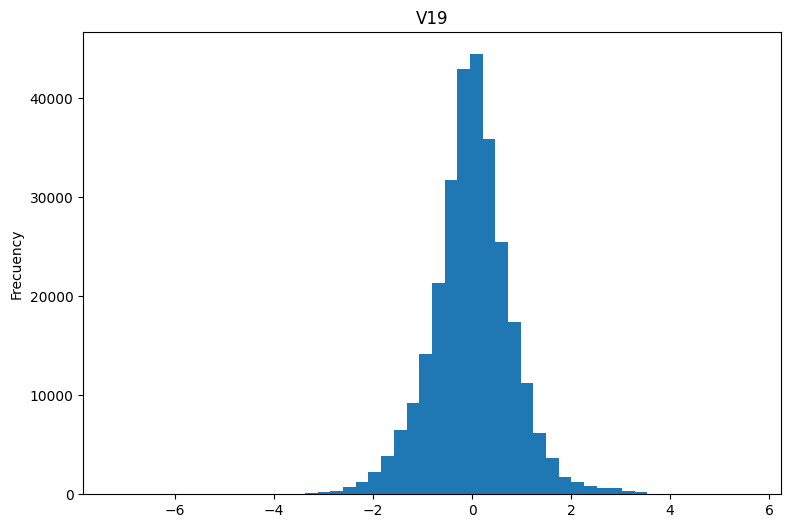

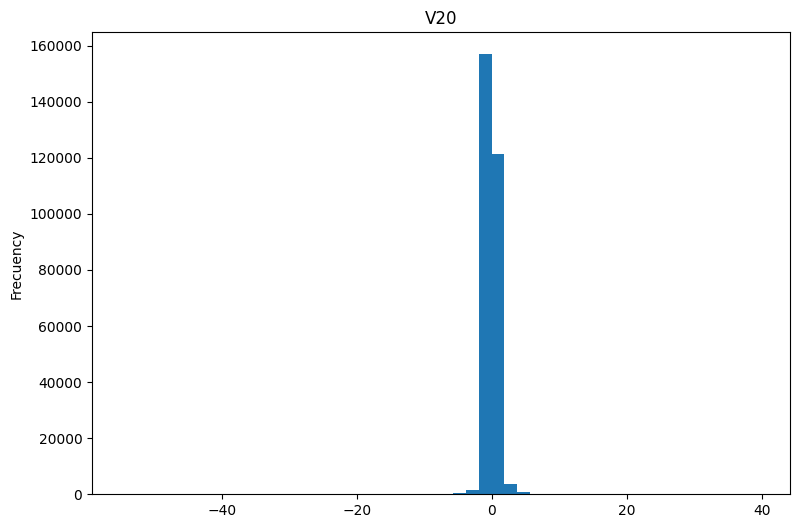

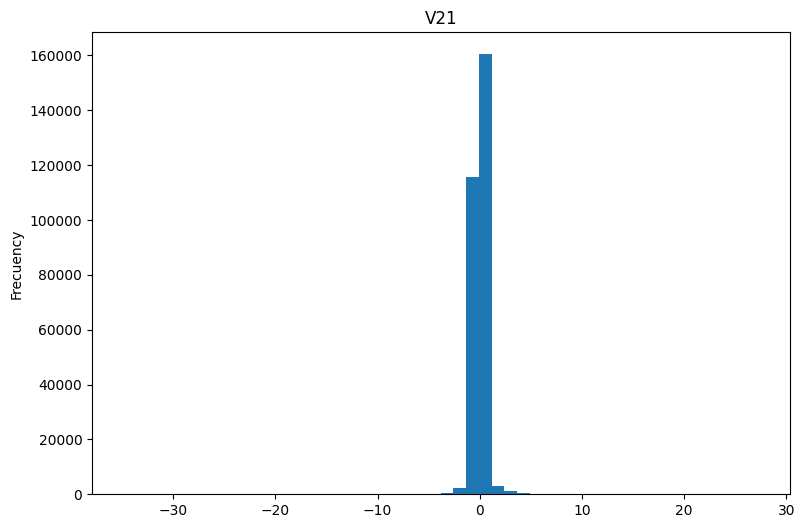

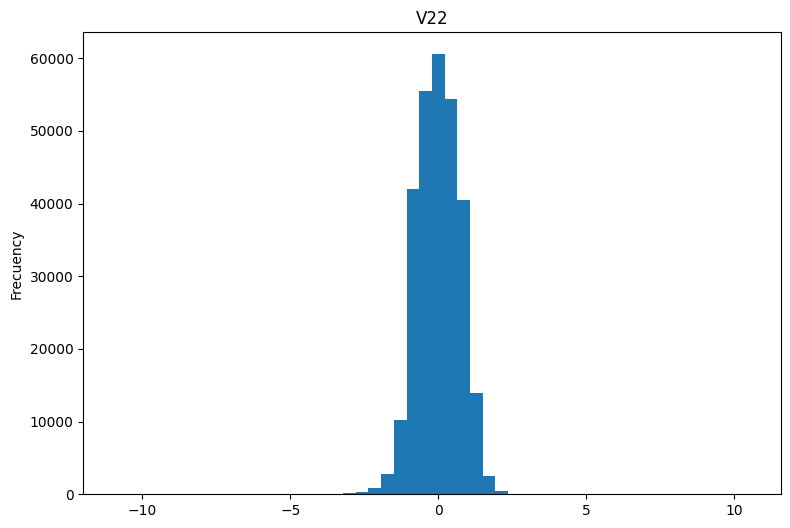

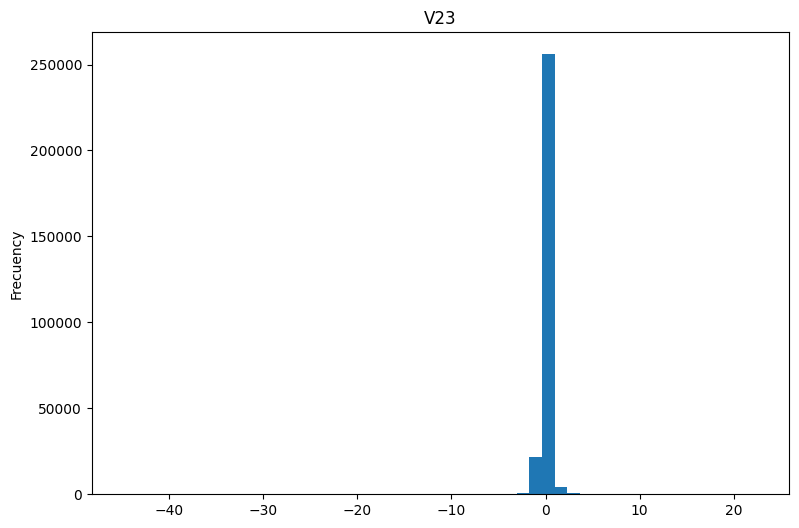

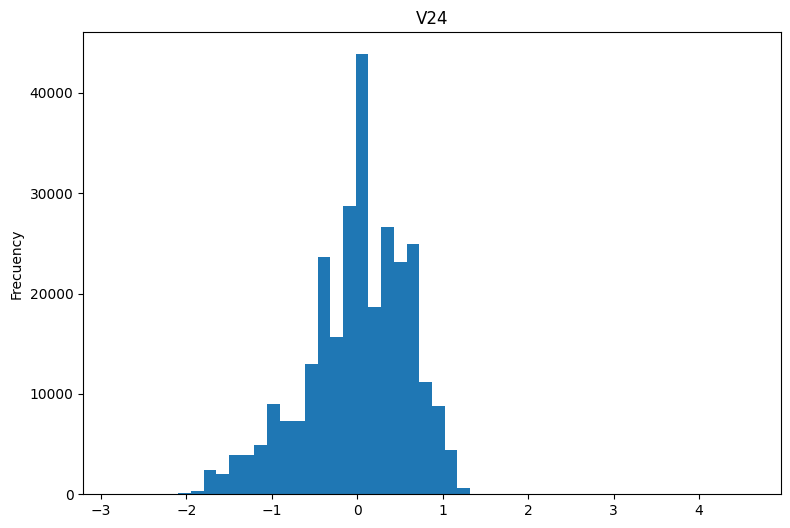

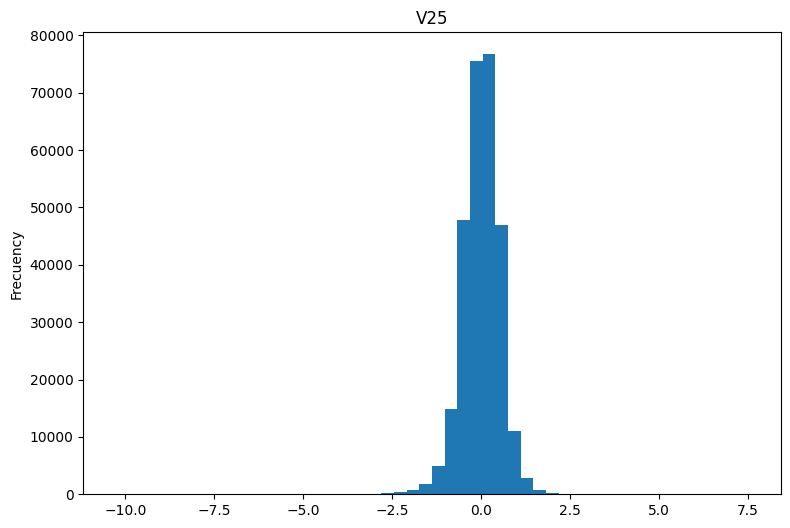

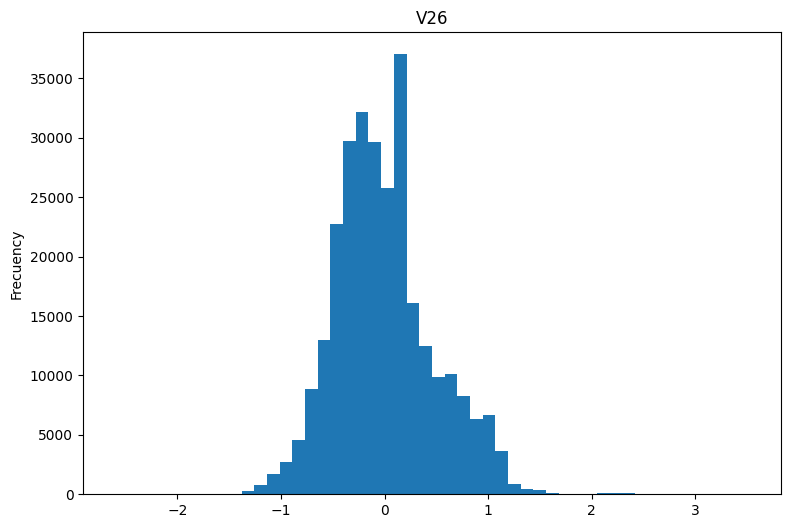

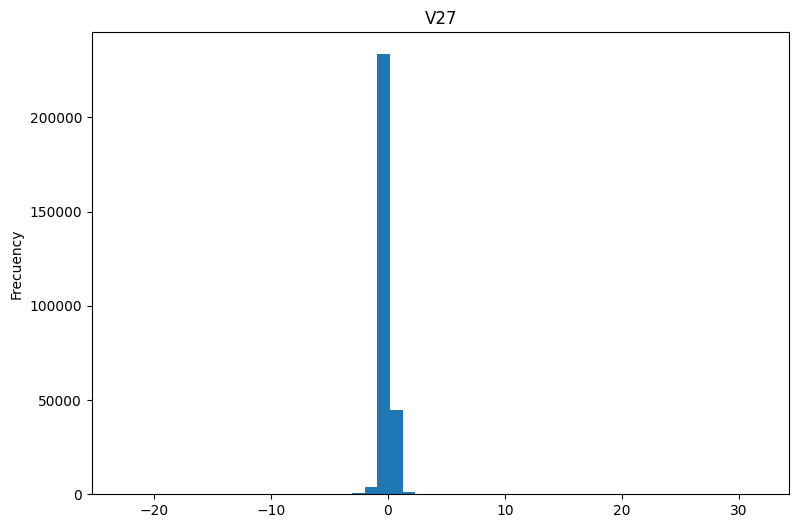

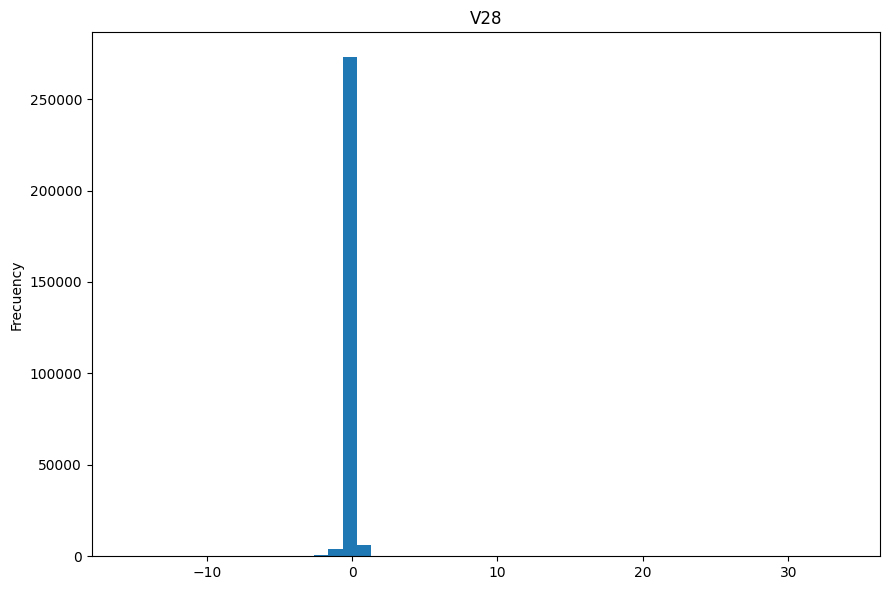

In [16]:
plt.rcParams.update({'figure.max_open_warning': 0})

features = df.iloc[:,1:29].columns

for i, f in enumerate(df[features]):
    fig, ax = plt.subplots(figsize=(9, 6))
    df[f].hist(bins=50, ax=ax, grid=False)
    ax.set_title(f, color='black')
    ax.set_ylabel("Frecuency")

fig.tight_layout()
plt.show()

## 4. Data balancing and normalization

To address the asymmetry that exists between fraud and non-fraud in the dataset, we take a random sample from the set of legitimate transactions of the same size as the set of fraudulent transactions. There are more sophisticated methods that will be analyzed and considered in the future [[2](https://www.aaai.org/Papers/Workshops/2000/WS-00-05/WS00-05-003.pdf), [3](https://ieeexplore.ieee.org/abstract/document/7376606),[10](https://ieeexplore.ieee.org/abstract/document/7376606),[11](https://www.sciencedirect.com/science/article/abs/pii/S0925231220306639),[12](https://www.sciencedirect.com/science/article/abs/pii/S0957417421001913)].

In [17]:
# Fraudulent transactions
fraud_tx = df.loc[df['Class'] == 1]

# Choose a random sample of legitimate observations of the same size as the fraudulent ones
legitimate_tx = df.loc[df['Class'] == 0].sample(n=fraud_tx.shape[0], random_state=7)

# Define new dataset
balance_df = pd.concat([fraud_tx, legitimate_tx])

In [18]:
balance_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [19]:
balance_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
259245,159027.0,1.792663,-0.045046,-1.948241,1.356496,0.481150,-1.361523,1.020553,-0.568261,-0.220205,...,0.215496,0.445274,-0.133709,0.003008,0.418642,-0.497243,-0.052997,-0.038930,144.00,0
273789,165700.0,1.842397,-0.521205,-4.030779,-0.621478,3.093832,2.703975,0.611700,0.385760,-0.096242,...,0.378423,0.868133,-0.308482,0.788056,0.810346,0.127778,-0.085250,-0.066571,149.46,0
196526,131551.0,2.079355,-0.964040,-0.644904,-0.483380,-0.875012,-0.318129,-0.786615,-0.110378,-0.022971,...,-0.642962,-1.365374,0.387561,-0.761005,-0.665203,0.272898,-0.021209,-0.037681,54.75,0
104629,69159.0,-1.089481,1.733716,0.366194,0.605195,0.264696,-0.390320,0.416644,0.243195,-0.456449,...,0.106197,0.368343,-0.257293,-0.416972,-0.011827,-0.288130,0.144697,0.196451,0.88,0
26700,34213.0,0.637783,-1.342133,0.129797,0.601724,-0.850978,0.549670,-0.290996,0.231801,-1.130368,...,-0.056718,-0.355168,-0.188398,-0.343582,0.168311,-0.312919,0.012889,0.060823,300.00,0


In [20]:
balance_df.shape

(984, 31)

Class Observations 

Class
1    492
0    492
Name: count, dtype: int64


Text(0.5, 1.0, 'Comparison of number of fraudulent transactions (1) vs. non-fraudulent (0)')

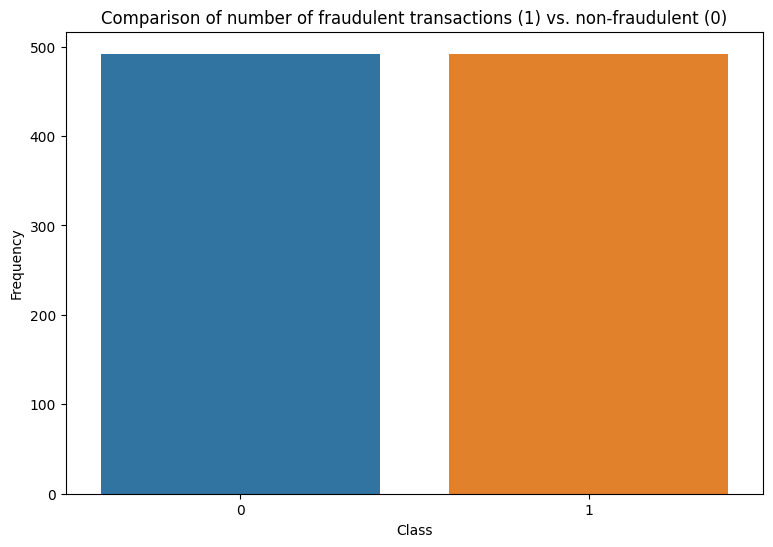

In [21]:
#Check that the number of observations of legitimate and fraudulent transactions is the same
print("Class","Observations", "\n")
print(balance_df['Class'].value_counts())

#Plot to make it more intuitive
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.countplot(data=balance_df, x="Class")

ax.set_xlabel("Class")
ax.set_ylabel("Frequency")
ax.set_title("Comparison of number of fraudulent transactions (1) vs. non-fraudulent (0)")

In [22]:
# Import StandardScaler from scikit-learn to normalize
from sklearn.preprocessing import StandardScaler

# Split the balanced dataframe into a matrix of features X and the response variable y.
X = balance_df.drop(['Class'], axis = 1)
y = balance_df['Class']

# Save the column names of the variables
features_columns = X.columns

# Normalize the matrix X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Pass matrix X as a pandas dataframe
X_normalized = pd.DataFrame(X_normalized, columns=features_columns)

X_normalized.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.797947,0.014813,0.040754,0.295612,0.527579,0.245227,-0.376506,0.026506,0.230788,-0.634747,...,-0.042781,0.063778,-0.019493,-0.360382,0.644788,0.024182,0.342750,0.172717,-0.399059,-0.289088
1,-1.796566,-0.118072,-1.345655,0.726350,-0.010982,0.674882,-0.183480,0.499483,-0.070416,0.438009,...,1.749212,0.115716,0.383181,1.139488,-0.454592,0.365360,-0.332313,-0.323601,-0.001228,1.074864
2,-1.713075,0.016426,-0.011548,0.495169,0.002126,0.176865,0.344296,0.538594,-0.138802,0.452045,...,-0.547997,-0.227939,-0.787433,0.159299,-0.084898,-0.266756,-1.162074,-0.041274,-0.420730,0.329537
3,-1.660260,-0.364182,-0.120327,0.138694,0.112261,0.106892,-0.525917,-0.131894,-0.107768,0.447961,...,-0.313579,0.084034,0.161950,-0.336754,-0.024329,0.325638,-1.401979,-0.878292,1.807074,-0.136965
4,-1.649107,0.659230,0.330487,-0.134557,0.759130,1.191838,-0.339792,0.728766,-0.158864,0.003648,...,-0.149687,-0.258463,-0.592132,-0.516459,-2.851826,2.118681,1.155157,-0.089158,0.245480,-0.286510


When performing a dataset reduction, what is expected is that the correlation between the variables will change. To check this, we build the correlation matrix of the balanced dataset.

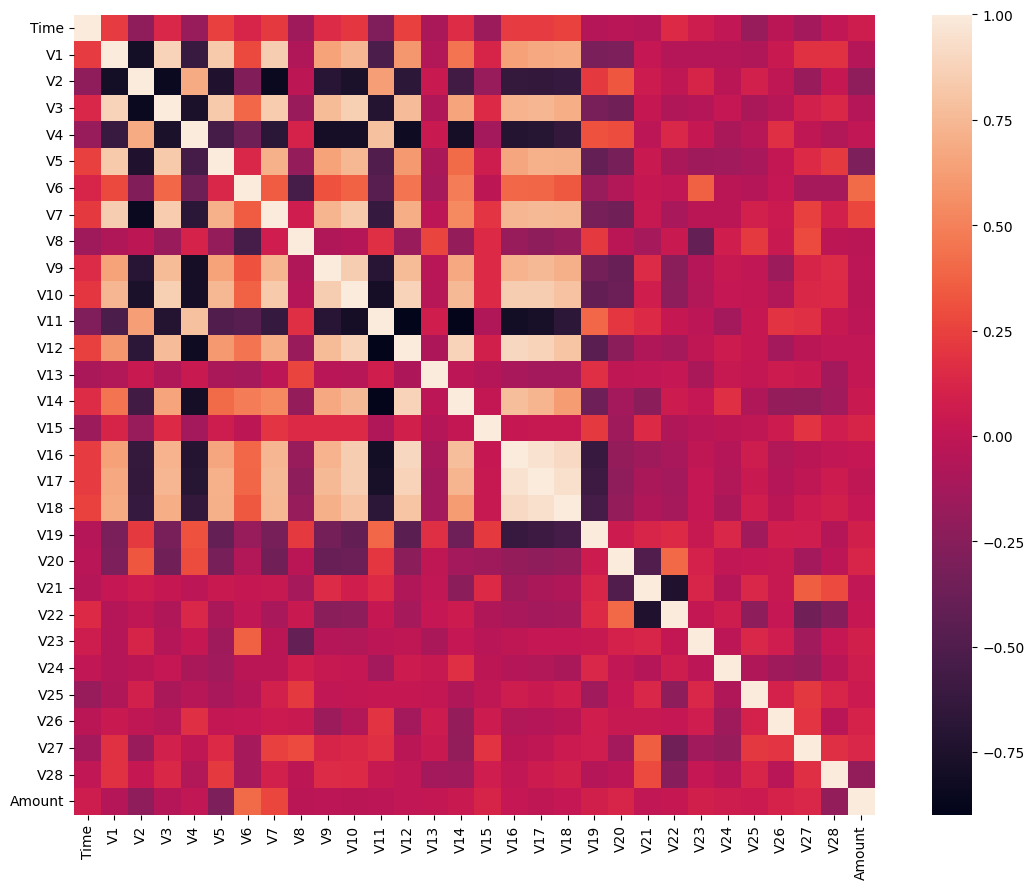

In [23]:
corr_balance_df= X_normalized.corr()
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_balance_df, vmax=1.0, square = True)
plt.tight_layout()

We observe that the features from V1 to V18 are correlated, which indicates that there are redundant variables. We take these variables to continue with the analysis, although a PCA could be performed on them to further reduce the number of dimensions.

## 5. Implementation and evaluation of machine learning algorithms

We apply six different ML models:

- Logistic Regression (LR)
- Random Forest (RF)
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Decision Tree (DT)
- Gradient Boosting (XGB)
- Neural Networks

## 6. Logistic Regression

## 7. Random Forest (RF) 

## 8. K-Nearest Neighbors (KNN)